The dataset was collected in Taiwan in 2005, when the credit card issuers faced the cash and credit card debt crisis. In order to increase market share, card-issuing banks over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and was a big challenge for both banks and cardholders.

Variables the dataset contains are:

  - LIMIT_BAL: credit limit in NT dollars (including for client's family)
  - GENDER: 1 = male, 2 = female
  - EDUCATION: 0 = doctorate, 1 = masters; 2 = bachelor; 3 = school graduate; 4 = elementary education; 5= other; 6 = no data.
  - MARITAL: marital status: 0 = no answer; 1 = married; 2 = single; 3 = no data. 
  - AGE: age in years
  - PAY_APR – PAY_SEP : history of past monthly payments, from April (PAY_APR) to September (PAY_SEP) 2005. The measurement scale for the repayment status is 0 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
  - BILL_APR – BILL_SEP: the amount of bill statement (NT dollars) each month
  - PAY_APR – PAY_SEP: the amount of previous payment (NT dollar) 
  - default: binary indicator of a default (1 = Yes, 0 = No)
  
We would like to explore whether there are differences between customers who defaulted and did not.<br>
Significance level for all the experiments is 0.95.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1">Read data</a></span></li><li><span><a href="#Credit-limit" data-toc-modified-id="Credit-limit-2">Credit limit</a></span></li><li><span><a href="#Gender" data-toc-modified-id="Gender-3">Gender</a></span></li><li><span><a href="#Education" data-toc-modified-id="Education-4">Education</a></span></li><li><span><a href="#Marital-status" data-toc-modified-id="Marital-status-5">Marital status</a></span></li><li><span><a href="#Age" data-toc-modified-id="Age-6">Age</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import median_test, mannwhitneyu, chi2_contingency, fisher_exact, ansari
from statsmodels.stats.proportion import test_proportions_2indep

In [2]:
def get_bootstrap_samples(x, n_resamples):
    indices = np.random.randint(0, len(x), (n_resamples, len(x)))
    resamples = x[indices]
    return resamples


def percentile_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries


def plot_density(data, position):
    sns.kdeplot(data, ax=position, shade=True)
    position.axvline(data.median(), linestyle='dashed', linewidth=2)

# Read data

In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')
print(data.shape)
data.head()

(30000, 25)


,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Check for missing values
data.isna().sum()

ID           0
LIMIT_BAL    0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
PAY_SEP      0
PAY_AUG      0
PAY_JUL      0
PAY_JUN      0
PAY_MAY      0
PAY_APR      0
BILL_SEP     0
BILL_AUG     0
BILL_JUL     0
BILL_JUN     0
BILL_MAY     0
BILL_APR     0
PAY_SEP.1    0
PAY_AUG.1    0
PAY_JUL.1    0
PAY_JUN.1    0
PAY_MAY.1    0
PAY_APR.1    0
default      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   GENDER     30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARITAL    30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_SEP    30000 non-null  int64
 7   PAY_AUG    30000 non-null  int64
 8   PAY_JUL    30000 non-null  int64
 9   PAY_JUN    30000 non-null  int64
 10  PAY_MAY    30000 non-null  int64
 11  PAY_APR    30000 non-null  int64
 12  BILL_SEP   30000 non-null  int64
 13  BILL_AUG   30000 non-null  int64
 14  BILL_JUL   30000 non-null  int64
 15  BILL_JUN   30000 non-null  int64
 16  BILL_MAY   30000 non-null  int64
 17  BILL_APR   30000 non-null  int64
 18  PAY_SEP.1  30000 non-null  int64
 19  PAY_AUG.1  30000 non-null  int64
 20  PAY_JUL.1  30000 non-null  int64
 21  PAY_JUN.1  3

In [6]:
data_default = data[data['default']==1]
data_no_default = data[data['default']==0]
print(f'There are {data_default.shape[0]} default observations and {data_no_default.shape[0]} non-default.')

There are 6636 default observations and 23364 non-default.


# Credit limit

Credit limit: test whether there are differences between median credit limits of two groups. 

First of all, let's just observe the distributions and medians for better understanding the situation.

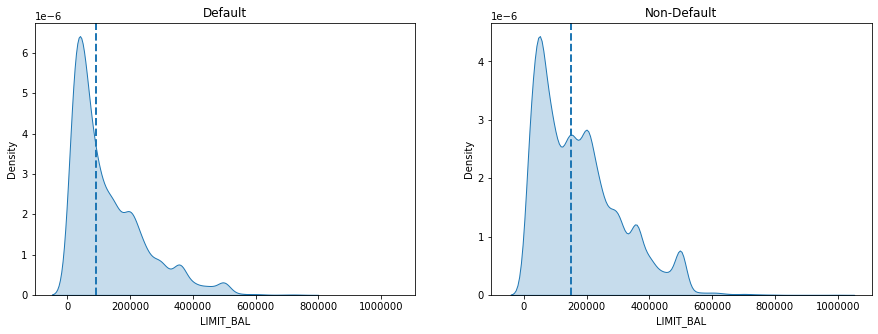

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))

plot_density(data_default['LIMIT_BAL'], axes[0])
axes[0].set_title('Default')
plot_density(data_no_default['LIMIT_BAL'], axes[1])
axes[1].set_title('Non-Default')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [8]:
data_default['LIMIT_BAL'].median()

90000.0

In [9]:
data_no_default['LIMIT_BAL'].median()

150000.0

We can see the 60000 difference in credit limit medians for 2 samples, but is it statistically significant? To answer this question, we can use either Mood's test or bootstrap confidence intervals. We can not use any parametric criterion because we don't know the distribution(from the picture) and more over we don't know parametric tests for medians.

Let's do the Mood's test first.

In [10]:
median_test(data_default['LIMIT_BAL'].values, data_no_default['LIMIT_BAL'].values)

(683.1982729785927,
 1.3471418011496707e-150,
 140000.0,
 array([[ 2314, 12396],
        [ 4322, 10968]], dtype=int64))

Mood’s median test p-value is 1.347e-150, much smaller than 0.05 (at 0.95 significance level), so there is enough evidence to **reject** the null hypothesis that the difference in medians equals to 0, so the medians are different(from practical point of view, the difference is significant also).

In [11]:
print(f"The odds ratio is: {(2314*10968)/(4322*12396):.3f}", "the outcome in the default group is 50% less than in the non-default group.")

The odds ratio is: 0.474 the outcome in the default group is 50% less than in the non-default group.


Let's do build bootstrap confidence intervals now. What exactly are we going to build interval for? Let's do it for the absolute difference in medians - we will check whether it contains zero(-> difference in medians is insignificant) or not.
Another way to do is to build 2 confidence intervals for both medians and see if they intersect.

In [12]:
# create bootstraped samples
default_bs = get_bootstrap_samples(data_default['LIMIT_BAL'].values,1000)
non_default_bs = get_bootstrap_samples(data_no_default['LIMIT_BAL'].values,1000)

In [13]:
np.random.seed(0)
# count absolute difference in medians for bootstraped samples
median_scores = [abs(np.median(default) - np.median(non_default)) for default,non_default in zip(default_bs,non_default_bs)]
print("95% confidence interval for the absolute median difference:",  percentile_interval(median_scores, 0.05))

95% confidence interval for the absolute median difference: [60000. 70000.]


We can see that the confidence interval of absolute difference of median credit limits between 2 groups does not contain 0 (and actually is far away from it), so the medians are different.

In [14]:
# count medians for bootstraped samples
median_d = [np.median(x) for x in default_bs]
median_nd = [np.median(x) for x in non_default_bs]

In [15]:
print("95% confidence interval for median credit limit for default group:",  percentile_interval(median_d, 0.05))
print("95% confidence interval for median credit limit for non-default group:",  percentile_interval(median_nd, 0.05))

95% confidence interval for median credit limit for default group: [80000. 90000.]
95% confidence interval for median credit limit for non-default group: [150000. 150000.]


We can see that the confidence intervals of median credit limit do not intersect for default and non-default groups. So we can say that median credit limits of two groups differ.

# Gender

Gender: test whether gender composition of two groups differ. 

Let's put the data on chart for better unerstanding the situation.

In [16]:
data['GENDER'] = data['GENDER'].replace({1:'male', 2:'female'})

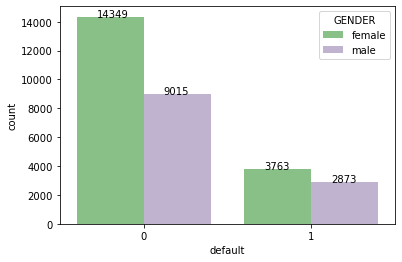

In [17]:
g = sns.countplot(data=data,hue='GENDER', x='default', palette='Accent')

for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.12, p.get_height()+1))
    
plt.show()

In [18]:
m = data_default[data_default['GENDER'] == 1].shape[0] / data_default.shape[0]
w = data_default[data_default['GENDER'] == 2].shape[0] / data_default.shape[0]
print(f'Percentage of men for default: {m:.2%}')
print(f'Percentage of women for default: {w:.2%}')

Percentage of men for default: 43.29%
Percentage of women for default: 56.71%


In [19]:
m = data_no_default[data_no_default['GENDER'] == 1].shape[0] / data_no_default.shape[0]
w = data_no_default[data_no_default['GENDER'] == 2].shape[0] / data_no_default.shape[0]
print(f'Percentage of men ofor default: {m:.2%}')
print(f'Percentage of women for default: {w:.2%}')

Percentage of men ofor default: 38.59%
Percentage of women for default: 61.41%


The gender composition seems to vary in 2 groups, but let's check if it's statistically significant. To do this we need a test for proportions. These tests are parametric(distribution is Bernoulli's). Let's use the basic Z test and the also the Wilson's interval based test. We can choose one proportion, for example, for men.

$𝐻_0$ : the proportion of men is the same for default and non-default groups ($p_1=p_2$).

$𝐻_1$ : men proportion is grater for the default group ($p_1>p_2$).

In [20]:
count1 = data_default[data_default['GENDER'] == 1].shape[0]
nobs1 = data_default.shape[0]
count2 = data_no_default[data_no_default['GENDER'] == 1].shape[0]
nobs2 = data_no_default.shape[0]

In [21]:
print("Z test: statistics {0:.2f}, p-value {1:.2e}".format(
    *test_proportions_2indep(count1,
                             nobs1,
                             count2,
                             nobs2,
                             alternative='larger',
                             method='wald',
                             return_results=False)))

Z test: statistics 6.86, p-value 3.47e-12


In [22]:
print("Wilson's interval based test statistics {0:.2f}, p-value {1:.2e}".
      format(*test_proportions_2indep(count1,
                                      nobs1,
                                      count2,
                                      nobs2,
                                      alternative='larger',
                                      method='score',
                                      correction=False,
                                      return_results=False)))

Wilson's interval based test statistics 6.92, p-value 2.24e-12


𝑝=2.24e-12 < 0.05 <br>
𝑝=3.47e-12 < 0.05 <br>
    – null hypothesis is **rejected**, gender proportion differs between two groups. From practical point of view, the difference is not so significant, especially taking into account the effect size counted below.

In [23]:
print(f"Effect size is: {6.86/np.sqrt(nobs1+nobs2):.3f}")

Effect size is: 0.040


In [24]:
a = data[(data['GENDER']=='male') & (data['default']==1)].shape[0]
d = data[(data['GENDER']=='female') & (data['default']==0)].shape[0]

b = data[(data['GENDER']=='male') & (data['default']==0)].shape[0]
c = data[(data['GENDER']=='female') & (data['default']==1)].shape[0]

In [25]:
print(f'Chances of men with default relative to the odds of women with default is not very high, only {(a*d)/(b*c):.2f} higher. So, the effect size is not big.')

Chances of men with default relative to the odds of women with default is not very high, only 1.22 higher. So, the effect size is not big.


# Education

Education: test whether education levels differs between two groups. If it does, then how exactly?

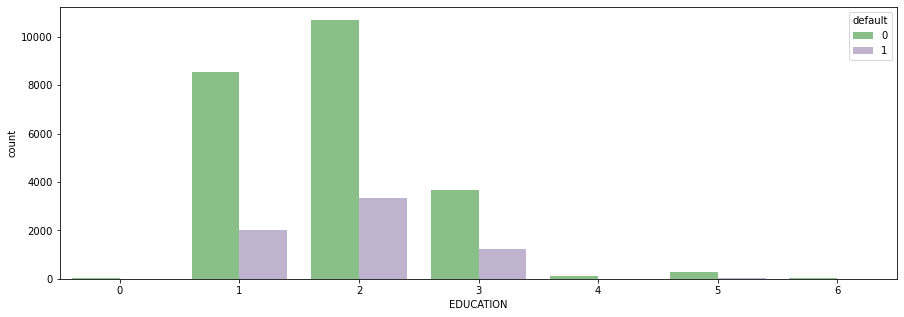

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='EDUCATION', hue='default', palette='Accent')
plt.show()

From the first glance, the education level have the same pattern for both groups, but let's check (assuming groups are independent)  if the samples are really taken from the same population, just the scale is different. For this purpose we are going to use non-parametric scale test. The whole class of non-parametric scale tests check the null hypothesis like: if there are 2 samples with pdfs $F_{X}$ and $\frac{1}{\lambda}*F_{\frac{X}{\lambda}}$, then $H_0$: $\lambda=0$ 

For the Ansari Test we are going to make, the hypothesis look like:

$H_0$: $\sigma_{1}^2 = \sigma_{2}^2;$ eduaction level distribution is equal for both groups
  
$H_1$: $\sigma_{1}^2 = \lambda * \sigma_{2}^2, \lambda\neq0;$  eduaction level distribution is different for both groups

Discreteness can be neglected due to big n1 and n2.

In [27]:
ansari(data_default['EDUCATION'].values, data_no_default['EDUCATION'].values)

AnsariResult(statistic=55661884.0, pvalue=2.438864643285091e-56)

𝑝=2.44×10−56 < 0.05  – null hypothesis is **rejected**, education levels differs between two groups. From practical point of view, the difference is not so significant, especially taking into account the affect size counted below.

In [28]:
rank_biserial = 2*81931254/(len(data_default['EDUCATION'])*len(data_no_default['EDUCATION']))-1
print(f"Rank-biserial effect size is {rank_biserial:.3f}") 

Rank-biserial effect size is 0.057


# Marital status

Now we want to check if marital status and default indicator are dependent.

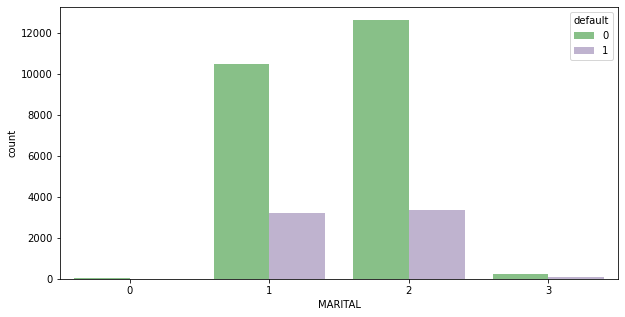

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='MARITAL', hue='default', palette='Accent')
plt.show()

Here we need to handle with categorical data, which is why we choose the Chi-squared test for independence checking.

$H_0$: marital status and default indicator are independent

$H_1$: $H_0$ is false

In [30]:
ct = pd.crosstab(data.MARITAL, data.default)
ct

default,0,1
MARITAL,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [31]:
np.set_printoptions(suppress=True)

In [32]:
chi2_contingency(ct)

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[   42.0552,    11.9448],
        [10637.6292,  3021.3708],
        [12432.7632,  3531.2368],
        [  251.5524,    71.4476]]))

𝑝=8.8×10−8 < 0.05  – null hypothesis is **rejected**,  marital status and default indicator are dependent. <br> None of the expected counts (the array returned above) are below 5, so chi-squared test is accurate and we don't need any more tests.

# Age

Age: test whether there are differences between mean ages of clients in two groups. 

If the age is distributed normally. we can use t-test to check means. If it is not, we will need some non-parametric test. So, let's start with checking the normality of the distributions.

In [33]:
age_default = data_default['AGE'].values
age_non_default = data_no_default['AGE'].values

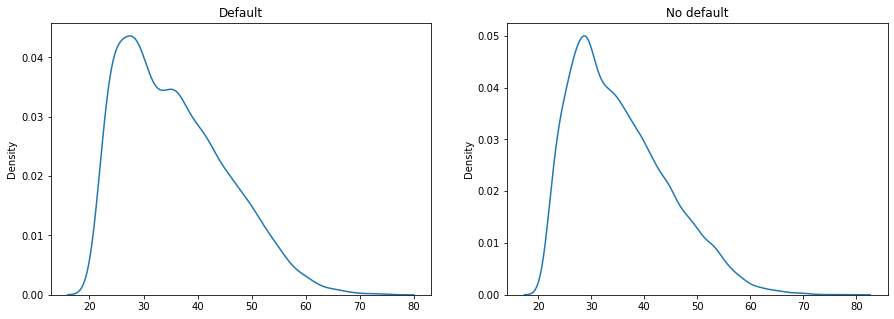

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.kdeplot(data=age_default, ax=axes[0])
axes[0].set_title('Default')
sns.kdeplot(data=age_non_default, ax=axes[1])
axes[1].set_title('No default')
plt.show()

Well, it is pretty obvious from the charts that the age is not distributed normally (I don't really think that any more formal tests are needed here).

So, we need a non-parametric test. Which one to choose? We could use popular Kolmogorov-Smirnov even though the age variable is not exactly continuous, it can be considered as ordinal (due to big n1 and n2). However we also assume that the observed groups are independent. So we can either choose the Mann-Whitney U test, or do a permutation test.

$H_0\colon F_{X_1}(x) = F_{X_2}(x);$    samples are taken from the same population, so their means are the same

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta<0;$    the first mean is greater

In [35]:
age_default.mean()

35.72573839662447

In [36]:
age_non_default.mean()

35.417265879130284

In [37]:
mannwhitneyu(age_default, age_non_default, alternative='greater')

MannwhitneyuResult(statistic=78076624.5, pvalue=0.1862517717449308)

𝑝=0.186 > 0.05 – there is **not enough evidence** to reject the null hypothesis, so the mean age doesn't differ for 2 groups. From practical point of view, the difference is not significant at all.

In [38]:
rank_biserial = 2*78076624.5/(len(age_default)*len(age_non_default))-1
print(f"Rank-biserial effect size is {rank_biserial:.3f}") 

Rank-biserial effect size is 0.007
